In [107]:
import pandas as pd
import numpy as np

In [108]:
MODEL_NAME = "resnet_gtsrb_new_models"

In [109]:
data = pd.read_csv(MODEL_NAME + ".csv")

In [110]:
data

,Unnamed: 0,layer_name,sample_id,num_of_injection,misclassifications,experiment
0,0,classes_conv1_conv,0,128,123,FaultInjection
1,1,classes_conv1_conv,1,128,126,FaultInjection
2,2,classes_conv1_conv,2,128,119,FaultInjection
3,3,classes_conv1_conv,3,128,123,FaultInjection
4,4,classes_conv1_conv,4,128,118,FaultInjection
...,...,...,...,...,...,...
1585,525,classes_conv5_block3_3_conv,5,128,53,Ranger_Ranger_Layer
1586,526,classes_conv5_block3_3_conv,6,128,60,Ranger_Ranger_Layer
1587,527,classes_conv5_block3_3_conv,7,128,60,Ranger_Ranger_Layer
1588,528,classes_conv5_block3_3_conv,8,128,66,Ranger_Ranger_Layer


In [111]:
#grouped_data = data.groupby(by=["layer_name","experiment"]).agg({'num_of_injection': np.sum, 'misclassifications': [np.sum, np.mean]}).reset_index()
grouped_data = data.groupby(by=["layer_name","experiment"]).agg({'num_of_injection': np.sum, 'misclassifications': [np.sum,]}).reset_index()

In [112]:
grouped_data_final = grouped_data.pivot(index ='layer_name', columns ='experiment')["misclassifications"]
grouped_data_final["num_of_injections"] = grouped_data["num_of_injection"].iloc[0].values[0]
#grouped_data_final.columns = grouped_data_final.columns.to_flat_index()
grouped_data_final

sum                        \
experiment                  FaultInjection Ranger_Clipping_Layer   
layer_name                                                         
classes_conv1_conv                    1146                     0   
classes_conv2_block1_0_conv           1010                     0   
classes_conv2_block1_1_conv           1003                     0   
classes_conv2_block1_2_conv           1151                     0   
classes_conv2_block1_3_conv           1043                     0   
classes_conv2_block2_1_conv           1004                     0   
classes_conv2_block2_2_conv           1160                     0   
classes_conv2_block2_3_conv           1026                     0   
classes_conv2_block3_1_conv            983                     0   
classes_conv2_block3_2_conv            757                     0   
classes_conv2_block3_3_conv            505                     0   
classes_conv3_block1_0_conv           1172                     0   
classes_conv3_block1_1_conv           1157                     0   
classes_conv3_block1_2_conv           1148                     0   
classes_conv3_block1_3_conv            985                     0   
classes_conv3_block2_1_conv           1022                     0   
classes_conv3_block2_2_conv           1173                     0   
classes_conv3_block2_3_conv           1007                     0   
classes_conv3_block3_1_conv            960                     0   
classes_conv3_block3_2_conv           1167                     0   
classes_conv3_block3_3_conv           1025                     0   
classes_conv3_block4_1_conv           1024                     0   
classes_conv3_block4_2_conv            740                     0   
classes_conv3_block4_3_conv            497                     0   
classes_conv4_block1_0_conv           1174                     0   
classes_conv4_block1_1_conv           1140                     0   
classes_conv4_block1_2_conv           1177                     0   
classes_conv4_block1_3_conv            918                     0   
classes_conv4_block2_1_conv            911                     0   
classes_conv4_block2_2_conv           1204                     0   
classes_conv4_block2_3_conv            945                     0   
classes_conv4_block3_1_conv            927                     0   
classes_conv4_block3_2_conv           1175                     0   
classes_conv4_block3_3_conv            935                     0   
classes_conv4_block4_1_conv            862                     0   
classes_conv4_block4_2_conv           1193                     0   
classes_conv4_block4_3_conv            925                     0   
classes_conv4_block5_1_conv            911                     0   
classes_conv4_block5_2_conv           1163                     0   
classes_conv4_block5_3_conv            929                     0   
classes_conv4_block6_1_conv            956                     0   
classes_conv4_block6_2_conv            739                     0   
classes_conv4_block6_3_conv            417                     0   
classes_conv5_block1_0_conv           1191                    50   
classes_conv5_block1_1_conv           1205                     0   
classes_conv5_block1_2_conv           1223                     1   
classes_conv5_block1_3_conv            894                    31   
classes_conv5_block2_1_conv            859                     7   
classes_conv5_block2_2_conv           1220                    49   
classes_conv5_block2_3_conv            780                    30   
classes_conv5_block3_1_conv            800                    51   
classes_conv5_block3_2_conv           1191                   111   
classes_conv5_block3_3_conv            816                    32   

                                                num_of_injections  
experiment                  Ranger_Ranger_Layer                    
layer_name                                                         
classes_conv1_conv        

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
grouped_data_final = grouped_data_final.drop(columns=["num_of_injections"])
grouped_data_final.columns = grouped_data_final.columns.droplevel(0)
grouped_data_final.reset_index()

experiment,layer_name,FaultInjection,Ranger_Clipping_Layer,Ranger_Ranger_Layer
0,classes_conv1_conv,1146,0,47
1,classes_conv2_block1_0_conv,1010,0,16
2,classes_conv2_block1_1_conv,1003,0,17
3,classes_conv2_block1_2_conv,1151,0,14
4,classes_conv2_block1_3_conv,1043,0,6
5,classes_conv2_block2_1_conv,1004,0,0
6,classes_conv2_block2_2_conv,1160,0,4
7,classes_conv2_block2_3_conv,1026,0,0
8,classes_conv2_block3_1_conv,983,0,0
9,classes_conv2_block3_2_conv,757,0,16


<AxesSubplot:xlabel='layer_name'>

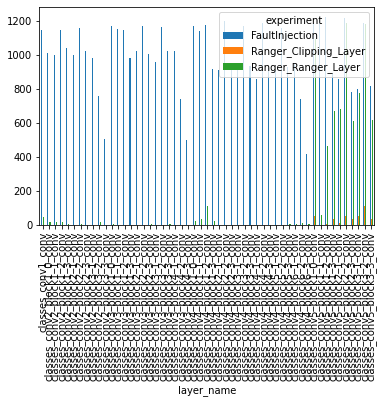

In [115]:
grouped_data_final.plot.bar()